# Тема проект: Выявить определяющие успешность игры закономерности по данным продаж игр магазина «Стримчик»

## План:
- выполнить подготовку для анализ исходных данных;
- провести исследовательский анализ данных, выявить какие-либо закономерности;
- составить портрет пользовательского региона;
- сформировать и проверить гипотезы;
- обобщающий вывод.

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import numpy as np
import seaborn as sns
from scipy import stats as st 

## Подготовка данных

In [46]:
# прочитать файл, выведем первые стороки на экран
data = pd.read_csv('/datasets/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [47]:
# общее представление о исходной таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [48]:
# заменим регистр в наименованиях столбцов
data.columns=data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [49]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков в столбцах от общего числа строк' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

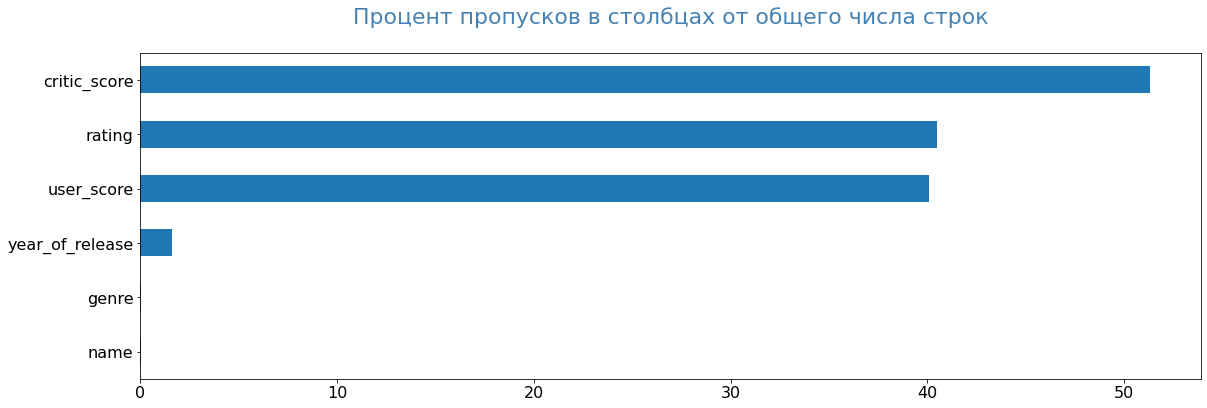

In [50]:
# Процент пропусков в столбцах от общего числа строк
pass_value_barh(data)

In [51]:
# замена tbd - абревиатура означающая отсутствиет оценки, меняем на нуль
data.loc[data['user_score']=='tbd','user_score']= "NaN"
data['rating']=data['rating'].fillna('unknown')

In [52]:
# удаление пропусков в столбце year_of_release
data=data.dropna(subset=['year_of_release','genre', 'name'])


In [53]:
#заменил тип данных столбца year_of_releas, т.к. целое число
data['year_of_release']=data['year_of_release'].astype(int)
# заменим тип данных столбца с object на float, т.к. значения в столбце с плавающей точкой  
data['user_score']=data['user_score'].astype(float)


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [55]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [56]:
# Cуммарные продажи по регионах, запись в отдельный столбец
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [57]:
# Проверка на наличие явных дубликатов. Явные дубликаты отсутствуют.
data.duplicated().sum()


0

***Промежуточные выводы по разделу подготовка данных***

1 Были удалены пропуски в столбцах year_of_release, genre, name. Суммарное количество удаленных пропуском не превышает 1,5% от общего числа.

2 Значение 'tbd' в столбце user_score означает отсутствие оценки на данный момент, заменил на NaN.  

3 Тип столбца year_of_release - float был заменен на int64, т.к. в нем находятся целочисленные значения. Тип столбца user_score был заменен на с object на float.

4 Возможные причины пропусков в столбцах:
- пользователи и игроки не захотели ставить оценок играм по личным причинам;
- игры некоторые игры непопулятрны в  ряде стран нет продаж, нет продаж - нет оценок;
- возможно отсутствие оценок - ноль; 
- по ошибке не заполнили соотвествующие поля при занесении при занесении в базу данных.

## Исследовательский анализ данных

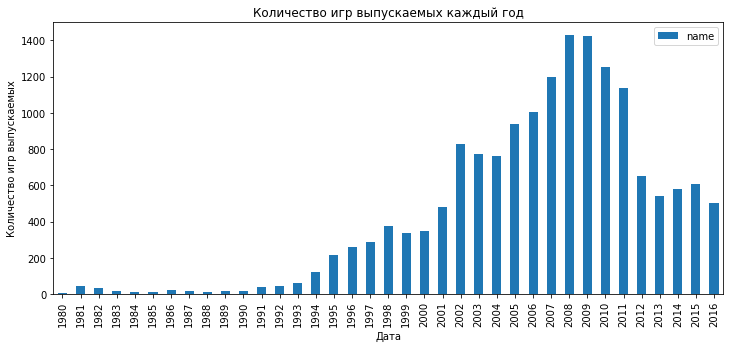

In [58]:
# Количество игр, выпускаемые по годам.
data.groupby('year_of_release')['name'].agg('count').reset_index() \
.plot(kind = 'bar', 
      y = 'name',
      x = 'year_of_release',
      ylabel = 'Количество игр выпускаемых',
      xlabel = 'Дата', 
      figsize = (12,5)) \
.set_title('Количество игр выпускаемых каждый год');

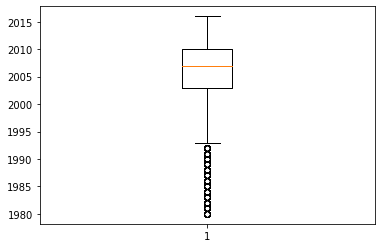

In [59]:
# Ящик с усами, что бы определить граница нормального распределения
plt.boxplot(data['year_of_release']);

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [60]:
# Сводная таблица по наименованию платформ и количество продаж на этих платформах по годам.
platform_sales_years=pd.pivot_table(data,index=['year_of_release','platform'], \
                                    values=['sum_sales'], aggfunc='sum')
display(platform_sales_years.head(15))

    

sum_sales
year_of_release platform           
1980            2600          11.38
1981            2600          35.68
1982            2600          28.88
1983            2600           5.84
                NES           10.96
1984            2600           0.27
                NES           50.08
1985            2600           0.45
                DS             0.02
                NES           53.44
                PC             0.04
1986            2600           0.67
                NES           36.41
1987            2600           1.94
                NES           19.76

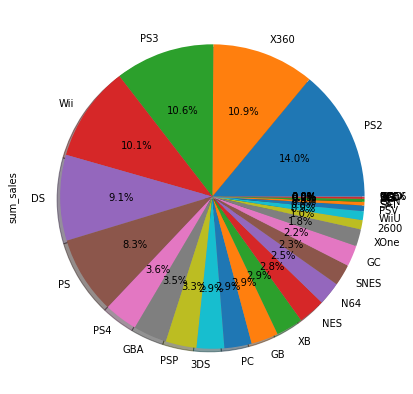

In [61]:
# Сводная таблица сумма продаж каждой из платформ 
platform_sales_names=pd.pivot_table(data,index=['platform'],values=['sum_sales'], aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False)
#display(platform_sales_names.head(15))

# График продаж по платформам в процентах от общего числа продаж 
platform_sales_names['sum_sales'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%',
                  shadow=True)
#plt.axis('platform')
plt.show()

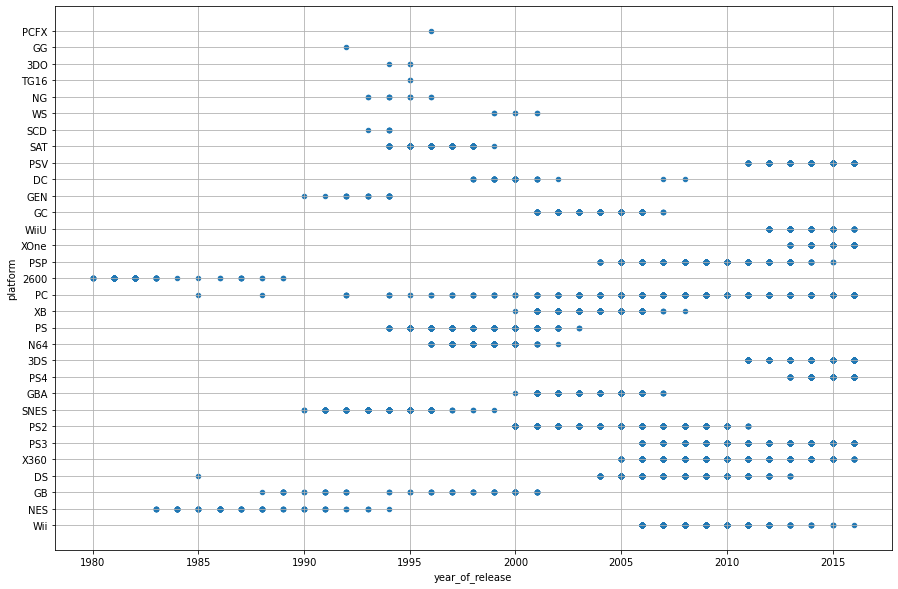

In [62]:
# График зависимости существования продаж игр на платформы по года
data.plot(x='year_of_release', y = 'platform', figsize=(15,10), grid= True, kind='scatter');


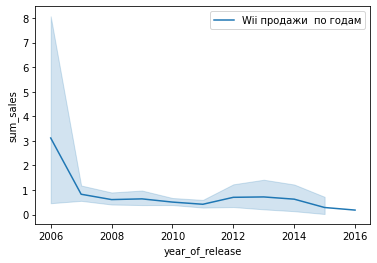

In [63]:
# Сумма продаж платформы Wii по годам
platform_wii=data.query('platform =="Wii"')
sns.lineplot(data=platform_wii, x='year_of_release', y = 'sum_sales', label = 'Wii продажи  по годам');

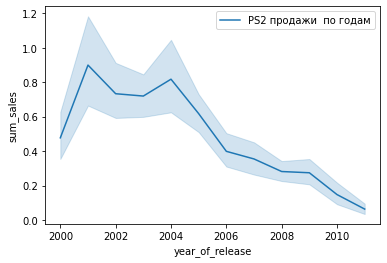

In [64]:
# Сумма продаж платформы PS2 по годам
platform_ps2=data.query('platform =="PS2"')
sns.lineplot(data=platform_ps2, x='year_of_release', y = 'sum_sales', label = 'PS2 продажи  по годам');

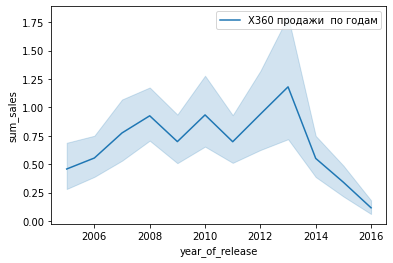

In [65]:
# Сумма продаж платформы X360 по годам
platform_x360=data.query('platform =="X360"')
sns.lineplot(data=platform_x360, x='year_of_release', y = 'sum_sales', label = 'X360 продажи  по годам');

In [66]:
# Сводная таблица по наименованию платформ и количество продаж на этих платформах по годам.
life_platform = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
display (life_platform.mean())


year_of_release    7.677419
dtype: float64

### Промежуточные выводы
- Была построена диаграмма размаха. Данные находщиеся до 1994 находятся более чем 1,5IQR, их можно не расматривать, они за границами доверительного интервала;
- Были определены платформы с самыми большими продажами РS2, X360, PS3, Wii. Общая закономерность продажи платформ постепенно угасают по истежению времени;
- Среднее время жизни платформы в среднем 7,7 лет.


### Для прогнозирования данных о продажах на 2017 актуальный период считаем данные за 2014...2016 года




In [67]:
# создали новую таблицу с актуальными данными за 2014...2016 года
data_2014_2016=data[data['year_of_release'].isin([2014,2015,2016])]
data_2014_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


In [68]:
# Сводная таблица сумма продаж каждой из платформ 
platform_sales_names_2=pd.pivot_table(data_2014_2016,index=['platform'],values=['sum_sales'], aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False)
display(platform_sales_names_2)



,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


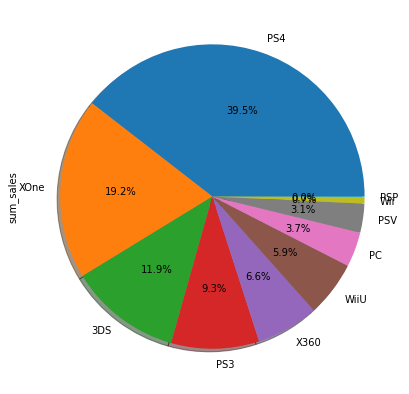

In [69]:
# График продаж по платформам в процентах от общего числа продаж 
platform_sales_names_2['sum_sales'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%',
                  shadow=True)
plt.show()

In [70]:
data_2014_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


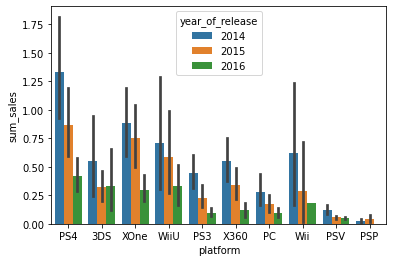

In [71]:
# Поиск прибыльных платформ в разрезе 2014...2016 годов
data_2014_2016 = data_2014_2016[(data_2014_2016['year_of_release'].isin([2014, 2015, 2016]))]
ax = sns.barplot(y='sum_sales', x='platform', hue='year_of_release',\
                 data = data_2014_2016)

**Лидирерами продаж в период 2014...2016 являются платформы: PS4, XOne, 3DS, PS3, X360. Ежегодное падение суммарных продаж от года к году.**

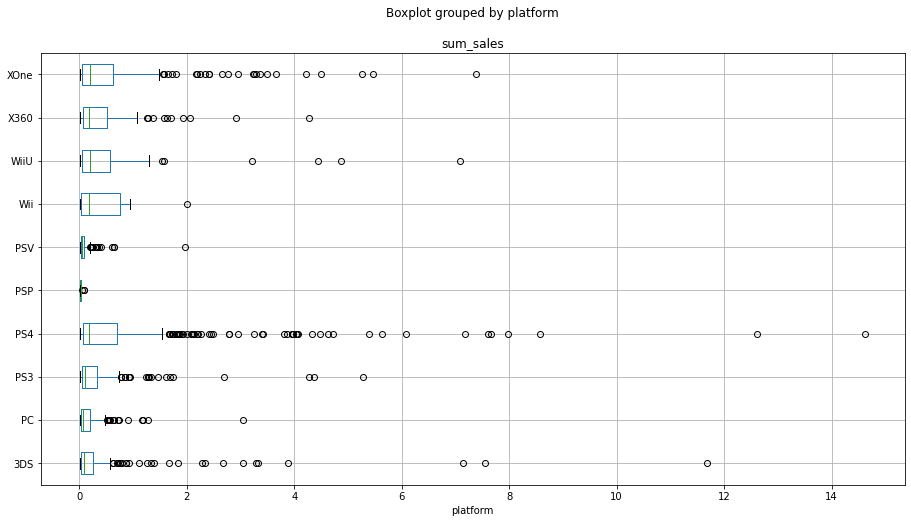

In [72]:
# график «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_2014_2016.boxplot(by='platform', column ='sum_sales', vert = False, figsize=(15, 8));



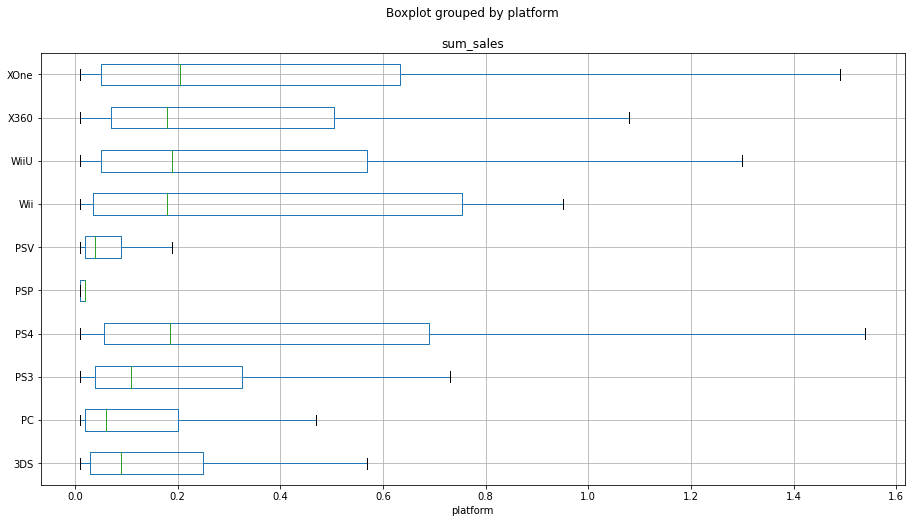

In [73]:
# график «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_2014_2016.boxplot(by='platform', column ='sum_sales', vert = False, figsize=(15, 8), showfliers=False);


**Описания диаграммы "Ящик с усами":**
- Данные по продажам плотно сгруппированы;
- Распределение несимметрично;
- Существуют выбрасы;
- Смещены вправо.


### Влияние на продажи платформы РS4 отзывов пользователей и критиков

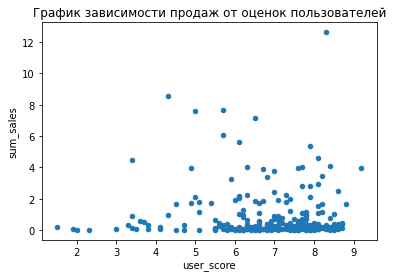

Коэфициент корреляции:  -0.040131589472697356


In [74]:
# График зависимости количества продаж от оценок пользователей
df = data_2014_2016.query('platform == "PS4" and user_score > 0')
#display(data_2014_2016.query('platform == "PS4" and user_score > 0').plot(x='user_score', y = 'sum_sales', kind = 'scatter'))
df.plot(x='user_score', y = 'sum_sales', kind = 'scatter', title = 'График зависимости продаж от оценок пользователей'),\
plt.show()
# Коэффициент корреляции 
print('Коэфициент корреляции: ', np.corrcoef(df['user_score'], df['sum_sales'])[0,1])

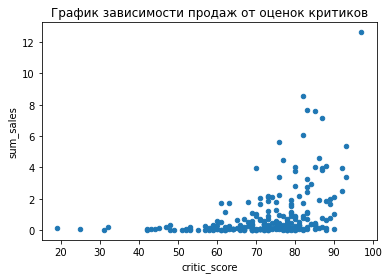

Коэфициент корреляции:  0.40266141068104083


In [75]:
# График зависимости количества продаж от оценок пользователей
df = data_2014_2016.query('platform == "PS4" and critic_score > 0')
df.plot(x='critic_score', y = 'sum_sales', kind = 'scatter', title = 'График зависимости продаж от оценок критиков'),\
plt.show()
# Коэффициент корреляции 
print('Коэфициент корреляции: ', np.corrcoef(df['critic_score'], df['sum_sales'])[0,1])

**Коэфффициент корреляции:**
- между количеством продаж и оценок пользователей равен -0.04 -связь слабая, отрицательная. Данное значение указывает на отсутвтвие зависимости между данными;
- между количеством продаж и оценок критиков равен 0.4 - связь ниже среднего, положительная. Зависимость есть но не сильная.


In [76]:
# Функция поиска зависимости количества продаж от оценок пользователей и критиков
def func_corr(platformi):
    df_1 = data_2014_2016.query('platform == @platformi and user_score > 0')
    df_1.plot(x='user_score', y = 'sum_sales', kind = 'scatter',\
              title = 'График зависимости продаж от оценок пользователей'),\
    plt.show()
    
              
    # Коэффициент корреляции 
    print('Коэфициент корреляции: ', np.corrcoef(df_1['user_score'], df_1['sum_sales'])[0,1])
    
    df_2 = data_2014_2016.query('platform == @platformi and critic_score > 0')
    df_2.plot(x='critic_score', y = 'sum_sales', kind = 'scatter', \
             title = 'График зависимости продаж от оценок критиков'),
    plt.show()
   
    # Коэффициент корреляции 
    print('Коэфициент корреляции: ', np.corrcoef(df_2['critic_score'], df_2['sum_sales'])[0,1])

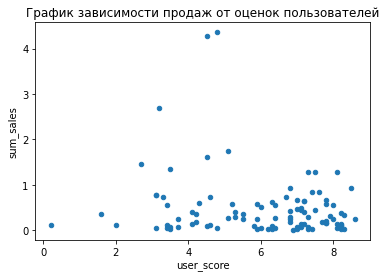

Коэфициент корреляции:  -0.16676141347662118


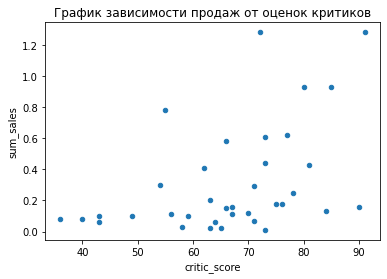

Коэфициент корреляции:  0.44657460493190704


In [77]:
# График зависимости продаж от оценок пользователей и критиков, коэффициента корреляр 
func_corr('PS3')


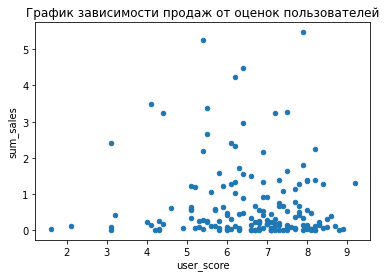

Коэфициент корреляции:  -0.0703839280647581


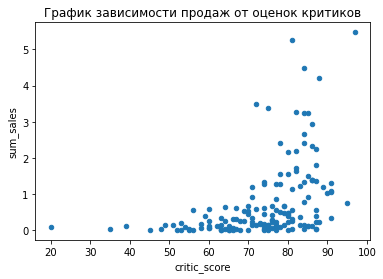

Коэфициент корреляции:  0.42867694370333226


In [78]:
func_corr('XOne')

**Проведена дополнительная проверка двух платформ для нахождения коэффициента корреляции. Проверка показала:**
- корреляция между оценками пользователей и количеством продаж отсутствует на всех платформах;
- корреляция между оценками критиков  и количеством продаж существует, но она не очень сильная.

### Общее распределение игр по жанрам. 

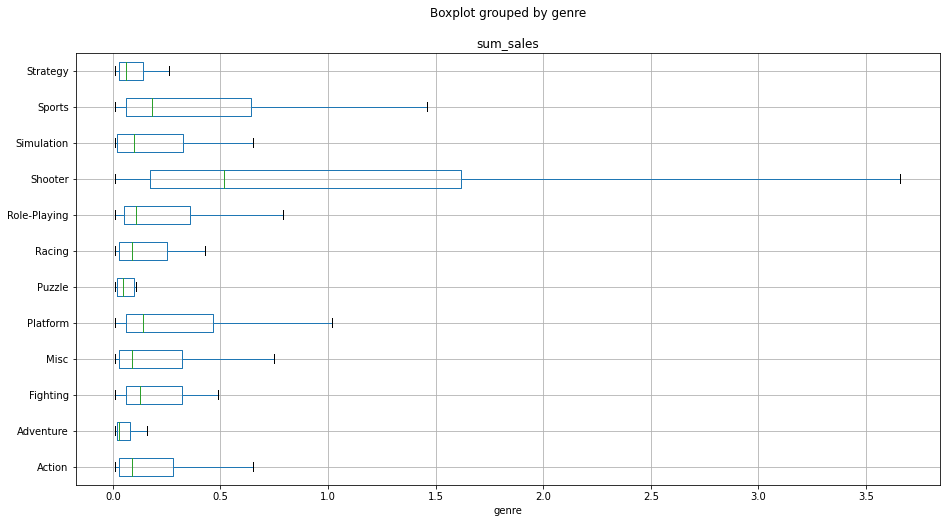

In [79]:
# График для оценки медианых продаж по жанрам
data_2014_2016.boxplot(by='genre', column ='sum_sales', vert = False, figsize=(15, 8), showfliers=False);

Cамыми прибыльными жанрами являются Shooter, Sport. Самыми низкими продажами являются игры жанров Adventure, Puzzle.

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [80]:
# Функция, которая строит в зависимости от региона три сводные таблицы с ТОП-5 популярных платформ, ТОП-5 попурных жанров,
# зависимость продажи от рейтинг ESRB.Строит по сводным таблицам круговые диаграммы.  

def func_country(country):
    # Сводная таблица  ТОП-5 платформы в кокретном регионе.
    country_sales_platform=pd.pivot_table(data_2014_2016,index=['platform'],values=[country], aggfunc='sum')\
                    .sort_values(by=country, ascending=False).head()
    display(country_sales_platform)
    
    # место размещения графика
    plt.subplot(3, 3, 1)
    # График ТОП-5 платформ в кокретном регионе в процентах
    country_sales_platform [country].plot(kind='pie', figsize=(15,15),
                autopct='%1.1f%%',
                shadow=True);
    
    
    # Сводная таблица для определения  ТОП-5 жанров в кокретном регионе.
    country_sales_genre=pd.pivot_table(data_2014_2016,index=['genre'],values=[country], aggfunc='sum')\
                    .sort_values(by=country, ascending=False).head()
    display(country_sales_genre)
    
    # место размещения графика
    plt.subplot(3, 3, 2)
    # График ТОП-5 популярных жанров в кокретном регионе
    country_sales_genre [country].plot(kind='pie', figsize=(15,15),
                autopct='%1.1f%%',
                shadow=True);
    
    # Сводная таблица рейтинг ESRB и продаж в конкретном регионе.
    country_sales_genre=pd.pivot_table(data_2014_2016,index=['rating'],values=[country], aggfunc='sum')\
                    .sort_values(by=country, ascending=False)
    display(country_sales_genre)
    
    # место размещения графика
    plt.subplot(3, 3, 3)
    # График ТОП-5 популярных жанров в кокретном регионе
    country_sales_genre [country].plot(kind='pie', figsize=(15,15),
                autopct='%1.1f%%',
                shadow=True);    

   

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


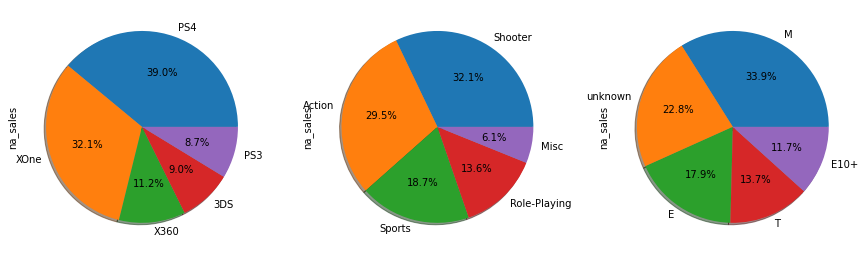

In [81]:
# Америка. Cводные таблицы с ТОП-5 популярных платформ, ТОП-5 попурных жанров,
# зависимость продажи от рейтинг ESRB.
func_country('na_sales')

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


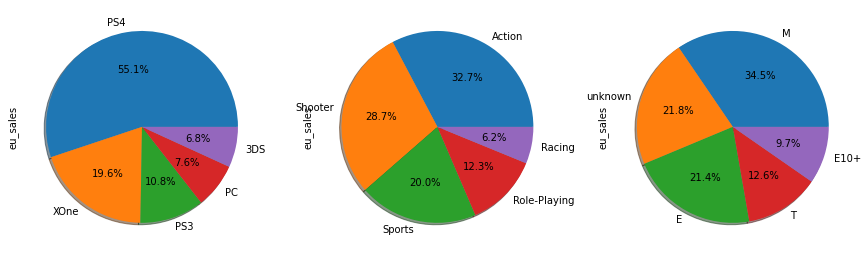

In [82]:
# Европа: Cводные таблицы с ТОП-5 популярных платформ, ТОП-5 попурных жанров,
# зависимость продажи от рейтинг ESRB.
func_country('eu_sales')

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


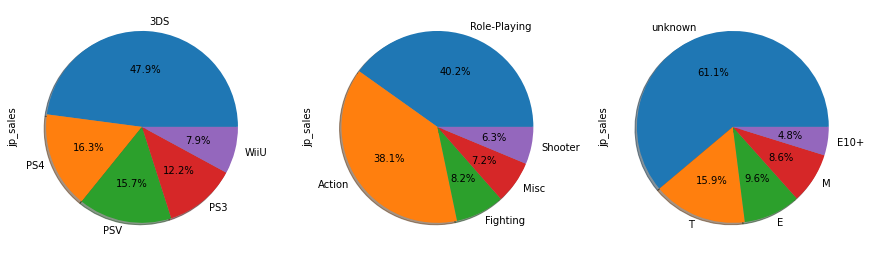

In [83]:
# Япония: Cводные таблицы с ТОП-5 популярных платформ, ТОП-5 попурных жанров,
# зависимость продажи от рейтинг ESRB.
func_country('jp_sales')

### Промежуточный вывод:
**1 ТОП-5 популярных платформ по странам:**
- Америка - PS4, XOne, X360, 3DS, PS3;
- Европа - PS4, XOne, PS3, PC, 3DS;
- Япония - 3DS, PS4, PSV, PS3, WiiU.

**2 Топ-5 популярных жанров по странам:**
- Америка - Shooter, Action, Sports, Role-Playing, Misc;
- Европа - Action, Shooter, Sports,Role-Playing, Racing;
- Япония - Role-Playing, Action, Fighting, Misc, Shooter.	

**Портреты пользователей Европы и Америки схожи. Они пользуются одинаковыми платформами, самыми популярными являются PS4 и XOne, любимые жанры шутеры и экшен. Отличие только в том, что у американских пользователей есть предпочтение к музыкальным играм, а  у европейцев в топ входят "гонки". Портрет японского игрока полностью отличается от европейцев и американцев, т.к. главный игровой жанр - ролевые игры, экшен, и файтинг, а основная консоль - 3DS.  Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше ( моем случает rating=unknown).**

## Проверка гипотез

### Гипотеза 1 -Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**Нулевая гипотеза: то средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC неодинаковые. Год исследования - 2014..2016.**

In [84]:
# Массив данных с рейтингами пользователей платформ Xbox One
xone = data_2014_2016.query('platform == "XOne"')['user_score']
# Массив данных с рейтингами пользователей платформ PC
pc = data_2014_2016.query('platform == "PC"')['user_score']

alpha = 0.05 # порог принятия верности гипотезы
result =st.ttest_ind(xone, pc, nan_policy= 'omit')
print (result.pvalue)
if result.pvalue > alpha:
    print('не можем отвергнуть нулевую гипотезу')
else:
    print ('отвергаем гипотезу')

0.10450507919348513
не можем отвергнуть нулевую гипотезу


### Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports  разные.

**Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные. Год исследования - 2014..2016.**


In [85]:
# Массив данных с рейтингами пользователей жанра Action
genre_action = data_2014_2016.query('genre == "Action"')['user_score']

# Массив данных с рейтингами пользователей жанра Sport
genre_sport = data_2014_2016.query('genre == "Sports"')['user_score']

alpha = 0.05 # порог принятия верности гипотезы
result =st.ttest_ind(genre_action, genre_sport,  nan_policy= 'omit')
print (result.pvalue)
if result.pvalue > alpha:
    print('не можем отвергнуть нулевую гипотезу')
else:
    print ('отвергаем гипотезу')

2.8711147985107304e-19
отвергаем гипотезу


**Предварительный вывод:**
- Первая гипотеза подтвердилась, вторую гипотезу отвергли. Они были сформированы согласно заданому условия;
- Применен критерий о равенстве средних двух генеральных совокупностей

## Общий вывод по проекту

1.1 Первичный анализ, подготовка данных:
- При подготовке данных к анализу в столюцах year_of_release, genre, name были удалены пропуски. Суммарное количество удаленных пропуском не превышает 1,5% от общего числа.
- В столбцах critic_score, user_score, rating заменены пропуски на 0. Явной замены для данных значений не нашлось. значение 'tbd' в столбце user_score означает отсутствие оценки на данный момент, так же было замено на 0. Возможно, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.
- Тип данных столбца year_of_release - float был заменен на int64, т.к. в нем находятся целочисленные значения. Тип столбца user_score был заменен на с object на float.

1.2 Возможные причины пропусков в столбцах:
- пользователи и игроки не захотели ставить оценок играм по личным причинам;
- некоторые игры непопулятрны в ряде стран нет продаж, нет продаж - нет оценок;
- некоректная работа сборщика;
- не получилось считать наименнование игры; 

2 Исследовательский анализ выполнен:

2.1 До 1994 года выпускалось не более 50 игр в год для разных платформ,  Данные находщиеся до 1994 находятся более чем 1,5IQR, их можно не расматривать, они за границами доверительного интервала.
2.2 Платформы с самыми большими продажами РS2, X360, PS3, Wii за весь рассотренный период времени. Общая закономерность продажи платформ постепенно угасают с течением времени. Средний срок жизни платформы - 7.7 лет
2.3 Для прогнозирования данных о продажах на 2017 актуальный период считаем данные за 2014...2016 года. Далее использовались лишь эти данные для анализа.
2.4 Лидирерами продаж в период 2014...2016 являются платформы: PS4, XOne, 3DS, PS3, X360. Наблюдается ежегодное падение суммарных продаж от года к году.
2.5 Были проанализирована распределениее продаж по платформам исходя из диаграммы "Ящик с усами", получены следующие результаты:
- Данные по продажам плотно сгруппированы;
- Распределение несимметрично;
- Существуют выбрасы;
- Смещены вправо.
2.6 На самых популярных, с точки зрения продаж, платформах был проведен корреляционный анализ, получили следующие выводы:
- корреляция между оценками пользователей и количеством продаж отсутствует. Значение коэф. корреляции около 0 связь слабая, отрицательная;
- корреляция между оценками критиков и количеством продаж существует, но она не очень сильная, связь положительная.Значение коэф. корреляции около 0.4.

2.7 Cамыми прибыльными жанрами являются Shooter, Sport. Самыми низкими продажами являются игры жанров Adventure, Puzzlе.

2.8  Портрет пользователя каждого региона

2.8.1 ТОП-5 популярных платформ по странам:
- Америка - PS4, XOne, X360, 3DS, PS3;
- Европа - PS4, XOne, PS3, PC, 3DS;
- Япония - 3DS, PS4, PSV, PS3, WiiU.

2.8.2 Топ-5 популярных жанров по странам:
- Америка - Shooter, Action, Sports, Role-Playing, Misc;
- Европа - Action, Shooter, Sports,Role-Playing, Racing;
- Япония - Role-Playing, Action, Fighting, Misc, Shooter.
Портреты пользователей Европы и Америки схожи. Они пользуются одинаковыми платформами, самыми популярными являются PS4 и XOne, любимые жанры "шутеры" и "экшен". Отличие только в том, что у американских пользователей есть предпочтение к музыкальным играм, а у европейцев в топ входят "гонки". Портрет японского игрока  отличается от европейцев и американцев, т.к. главный игровой жанр - ролевые игры, экшен, и файтинг, а основная консоль - 3DS. Рейтинг ESRB влияет на европейских и американских игроков, в Японии на данный рейтинг меньше обращают внимание, сумарные продажи игр без рейтинга 61%.

3 Проверка гипотез. Был применен критерий о равенстве средних двух генеральных совокупностей.
3.1  Первая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась. Сформулирована гипотеза была следующим образом: Если гипотеза будет подтвреждена- то средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а в случае не подтвержения, принимаем альтернативную гипотезу о неравенстве средних. Год исследования - 2014..2016. 

3.2 Вторая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" отвергнута. Сформулирована гипотеза была следующим образом: Если гипотеза будет подтвреждена- то средние пользовательские рейтинги жанров Action и Sports разные, а в случае не подтвержения, принимаем альтернативную гипотезу о равенстве средних рейтингов. Год исследования - 2014..2016.
